In [344]:
# Part 2.a

import pandas as pd
import numpy as np
from random import randint
from random import random
df = pd.read_csv("genres_V2.csv")
df.drop(columns=["uri","track_href", "title", "analysis_url", "id","Unnamed: 0"],inplace=True,axis=1)

# Create Inconsistent Data
df["duration_ms"] = [-x if randint(0,10) == 3 else x for x in df["duration_ms"].values]
df["loudness"] = [randint(70, 120) if randint(0,100) == 42 else x for x in df["loudness"].values]
df["key"] = [x+random() for x in df["key"].values]

# Create Dictionary with column name, type, and real type.
fields = {"Fields":[str(x) for x in df.columns], "Types":[str(df[x].dtype) for x in df.columns],
         "Real Type": ["int64" if x == "key" else str(df[x].dtype) for x in df.columns]}

display(df.sample(10))
fields_DataFrame = pd.DataFrame(data=fields)
display(fields_DataFrame)
display(df.sample(5))

/var/folders/n8/hdnfk3kd3p1d7wvb85hj9zv40000gn/T/ipykernel_75488/3839712017.py:7: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("genres_V2.csv")


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,genre,song_name
15438,0.749,0.398,5.720564,-7.440,0,0.1710,0.648000,0.000001,0.1150,0.0859,80.032,audio_features,226040,4,Rap,Myself
4116,0.721,0.349,1.163746,-18.441,1,0.4310,0.846000,0.833000,0.0789,0.0997,190.053,audio_features,110315,4,Dark Trap,Bich Killa
24468,0.748,0.850,9.401607,-8.256,0,0.0734,0.000115,0.667000,0.0350,0.2830,123.982,audio_features,253590,4,techhouse,NaN
37716,0.424,0.954,7.968848,-4.598,0,0.0437,0.002090,0.214000,0.0733,0.3870,173.982,audio_features,252083,4,dnb,NaN
2548,0.555,0.694,2.176783,-8.565,1,0.0796,0.117000,0.906000,0.1250,0.1540,210.010,audio_features,201174,4,Dark Trap,Empty Skies
33201,0.678,0.682,7.624470,-15.802,1,0.0388,0.010000,0.851000,0.1140,0.2760,141.037,audio_features,486267,4,psytrance,NaN
646,0.851,0.688,1.527059,-6.389,0,0.0949,0.154000,0.062000,0.0978,0.5070,142.025,audio_features,163448,4,Dark Trap,company
18726,0.836,0.670,5.454968,-6.907,0,0.2300,0.008260,0.000355,0.0837,0.5560,107.018,audio_features,305350,4,Hiphop,Dang! (feat. Anderson .Paak)
21289,0.775,0.837,10.180739,-4.965,0,0.3900,0.038300,0.000000,0.3150,0.8070,191.720,audio_features,244600,4,Hiphop,Part II
32024,0.745,0.918,7.523593,-5.306,1,0.0411,0.027500,0.799000,0.1280,0.1530,137.995,audio_features,507826,4,psytrance,NaN


,Fields,Types,Real Type
0,danceability,float64,float64
1,energy,float64,float64
2,key,float64,int64
3,loudness,float64,float64
4,mode,int64,int64
5,speechiness,float64,float64
6,acousticness,float64,float64
7,instrumentalness,float64,float64
8,liveness,float64,float64
9,valence,float64,float64


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,genre,song_name
38750,0.608,0.770,3.870042,-4.772,0,0.0511,0.00145,0.672000,0.0904,0.037,174.976,audio_features,334629,4,dnb,NaN
37019,0.534,0.973,0.112181,-2.452,1,0.0823,0.00880,0.423000,0.1110,0.347,171.968,audio_features,360000,4,dnb,NaN
18575,0.951,0.600,0.489122,-4.675,0,0.0685,0.10600,0.000000,0.0712,0.822,125.040,audio_features,-218573,4,Hiphop,Temperature
38659,0.550,0.974,0.983686,-3.844,1,0.0383,0.00180,0.890000,0.1510,0.235,173.989,audio_features,354000,4,dnb,NaN
18704,0.409,0.720,1.591433,-9.250,0,0.1810,0.11000,0.000024,0.1810,0.543,133.429,audio_features,-153667,4,Hiphop,Now & Later Gators


In [345]:
# Part 2.b.1

# Dictionary listing which column has inconsistent or missing data.
fields2 = {"Fields":[str(x) for x in df.columns], 
          "Inconsistencies":[True if x in [2, 14] else False for x in range(len(df.columns))],
         "Missing Data": [True if df[col].isnull().any() else False for col in df.columns]}

# Create dataframe for the dictionary.
fields2_DataFrame = pd.DataFrame(data=fields2)



# Change key from float64 to int64
df['key'] = df['key'].apply(lambda x: int(x))

# Impute Song names with NaN values to No name.
df["song_name"] = df["song_name"].fillna("No Name")

# Changing duration_ms to seconds for convenience and fixing inconsistency for negative values.
df.rename(columns = {'duration_ms':"duration_sec"}, inplace = True)
df["duration_sec"] = df["duration_sec"].apply(lambda x: abs(int(x/1000)))

display(fields2_DataFrame)
display(df)

,Fields,Inconsistencies,Missing Data
0,danceability,False,False
1,energy,False,False
2,key,True,False
3,loudness,False,False
4,mode,False,False
5,speechiness,False,False
6,acousticness,False,False
7,instrumentalness,False,False
8,liveness,False,False
9,valence,False,False


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_sec,time_signature,genre,song_name
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,audio_features,124,4,Dark Trap,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,audio_features,224,4,Dark Trap,Pathology
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,audio_features,98,4,Dark Trap,Symbiote
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,audio_features,123,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,audio_features,123,4,Dark Trap,Venom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,audio_features,269,4,hardstyle,No Name
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,audio_features,210,4,hardstyle,No Name
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,audio_features,234,4,hardstyle,No Name
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,audio_features,323,4,hardstyle,No Name


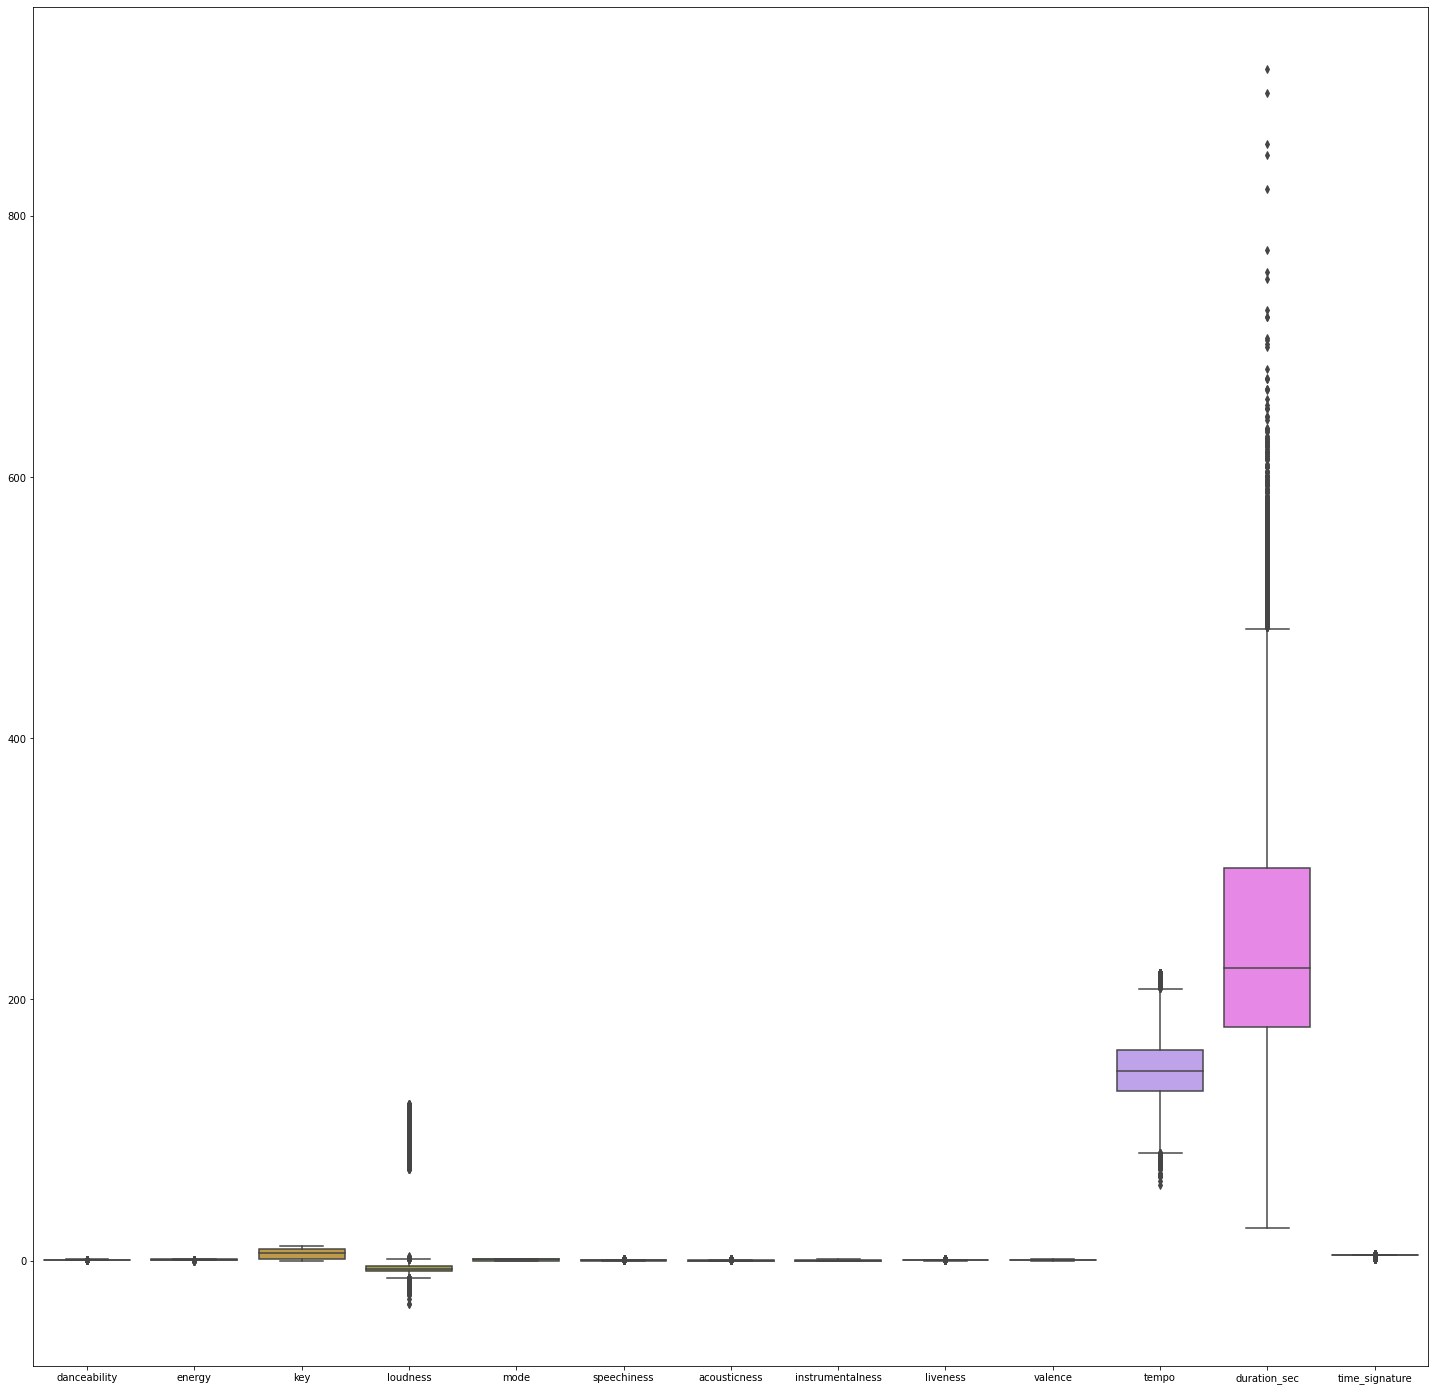

In [347]:
# Part 2.b.2

import matplotlib.pyplot as plt
import seaborn as sns


numeric_columns = df.select_dtypes(exclude='object').columns
plt.figure(figsize=(25,25))
sns.boxplot(data=df)
plt.show()    


